In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

# Show all columns on output
pd.set_option('display.max_columns', 999)

In [50]:
wineRed_df = pd.read_csv("winequality-red.csv", delimiter=';')
wineWhite_df = pd.read_csv("winequality-white.csv", delimiter=';')

print(wineRed_df.head(10))
print(wineRed_df.head(10))

         fixed acidity     volatile acidity          citric acid  \
0                 7.40                 0.70                 0.00   
1                 7.80                 0.88                 0.00   
2                 7.80                 0.76                 0.04   
3                11.20                 0.28                 0.56   
4                 7.40                 0.70                 0.00   
5                 7.40                 0.66                 0.00   
6                 7.90                 0.60                 0.06   
7                 7.30                 0.65                 0.00   
8                 7.80                 0.58                 0.02   
9                 7.50                 0.50                 0.36   

        residual sugar            chlorides  free sulfur dioxide  \
0                 1.90                 0.08                11.00   
1                 2.60                 0.10                25.00   
2                 2.30                 0.09    

In [51]:
wineRed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Clustering for Red Wine.

In [52]:
wineRed_df = wineRed_df.drop(columns={'quality'})
wineRed_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.20,0.60,0.08,2.00,0.09,32.00,44.00,0.99,3.45,0.58,10.50
1595,5.90,0.55,0.10,2.20,0.06,39.00,51.00,1.00,3.52,0.76,11.20
1596,6.30,0.51,0.13,2.30,0.08,29.00,40.00,1.00,3.42,0.75,11.00
1597,5.90,0.65,0.12,2.00,0.07,32.00,44.00,1.00,3.57,0.71,10.20


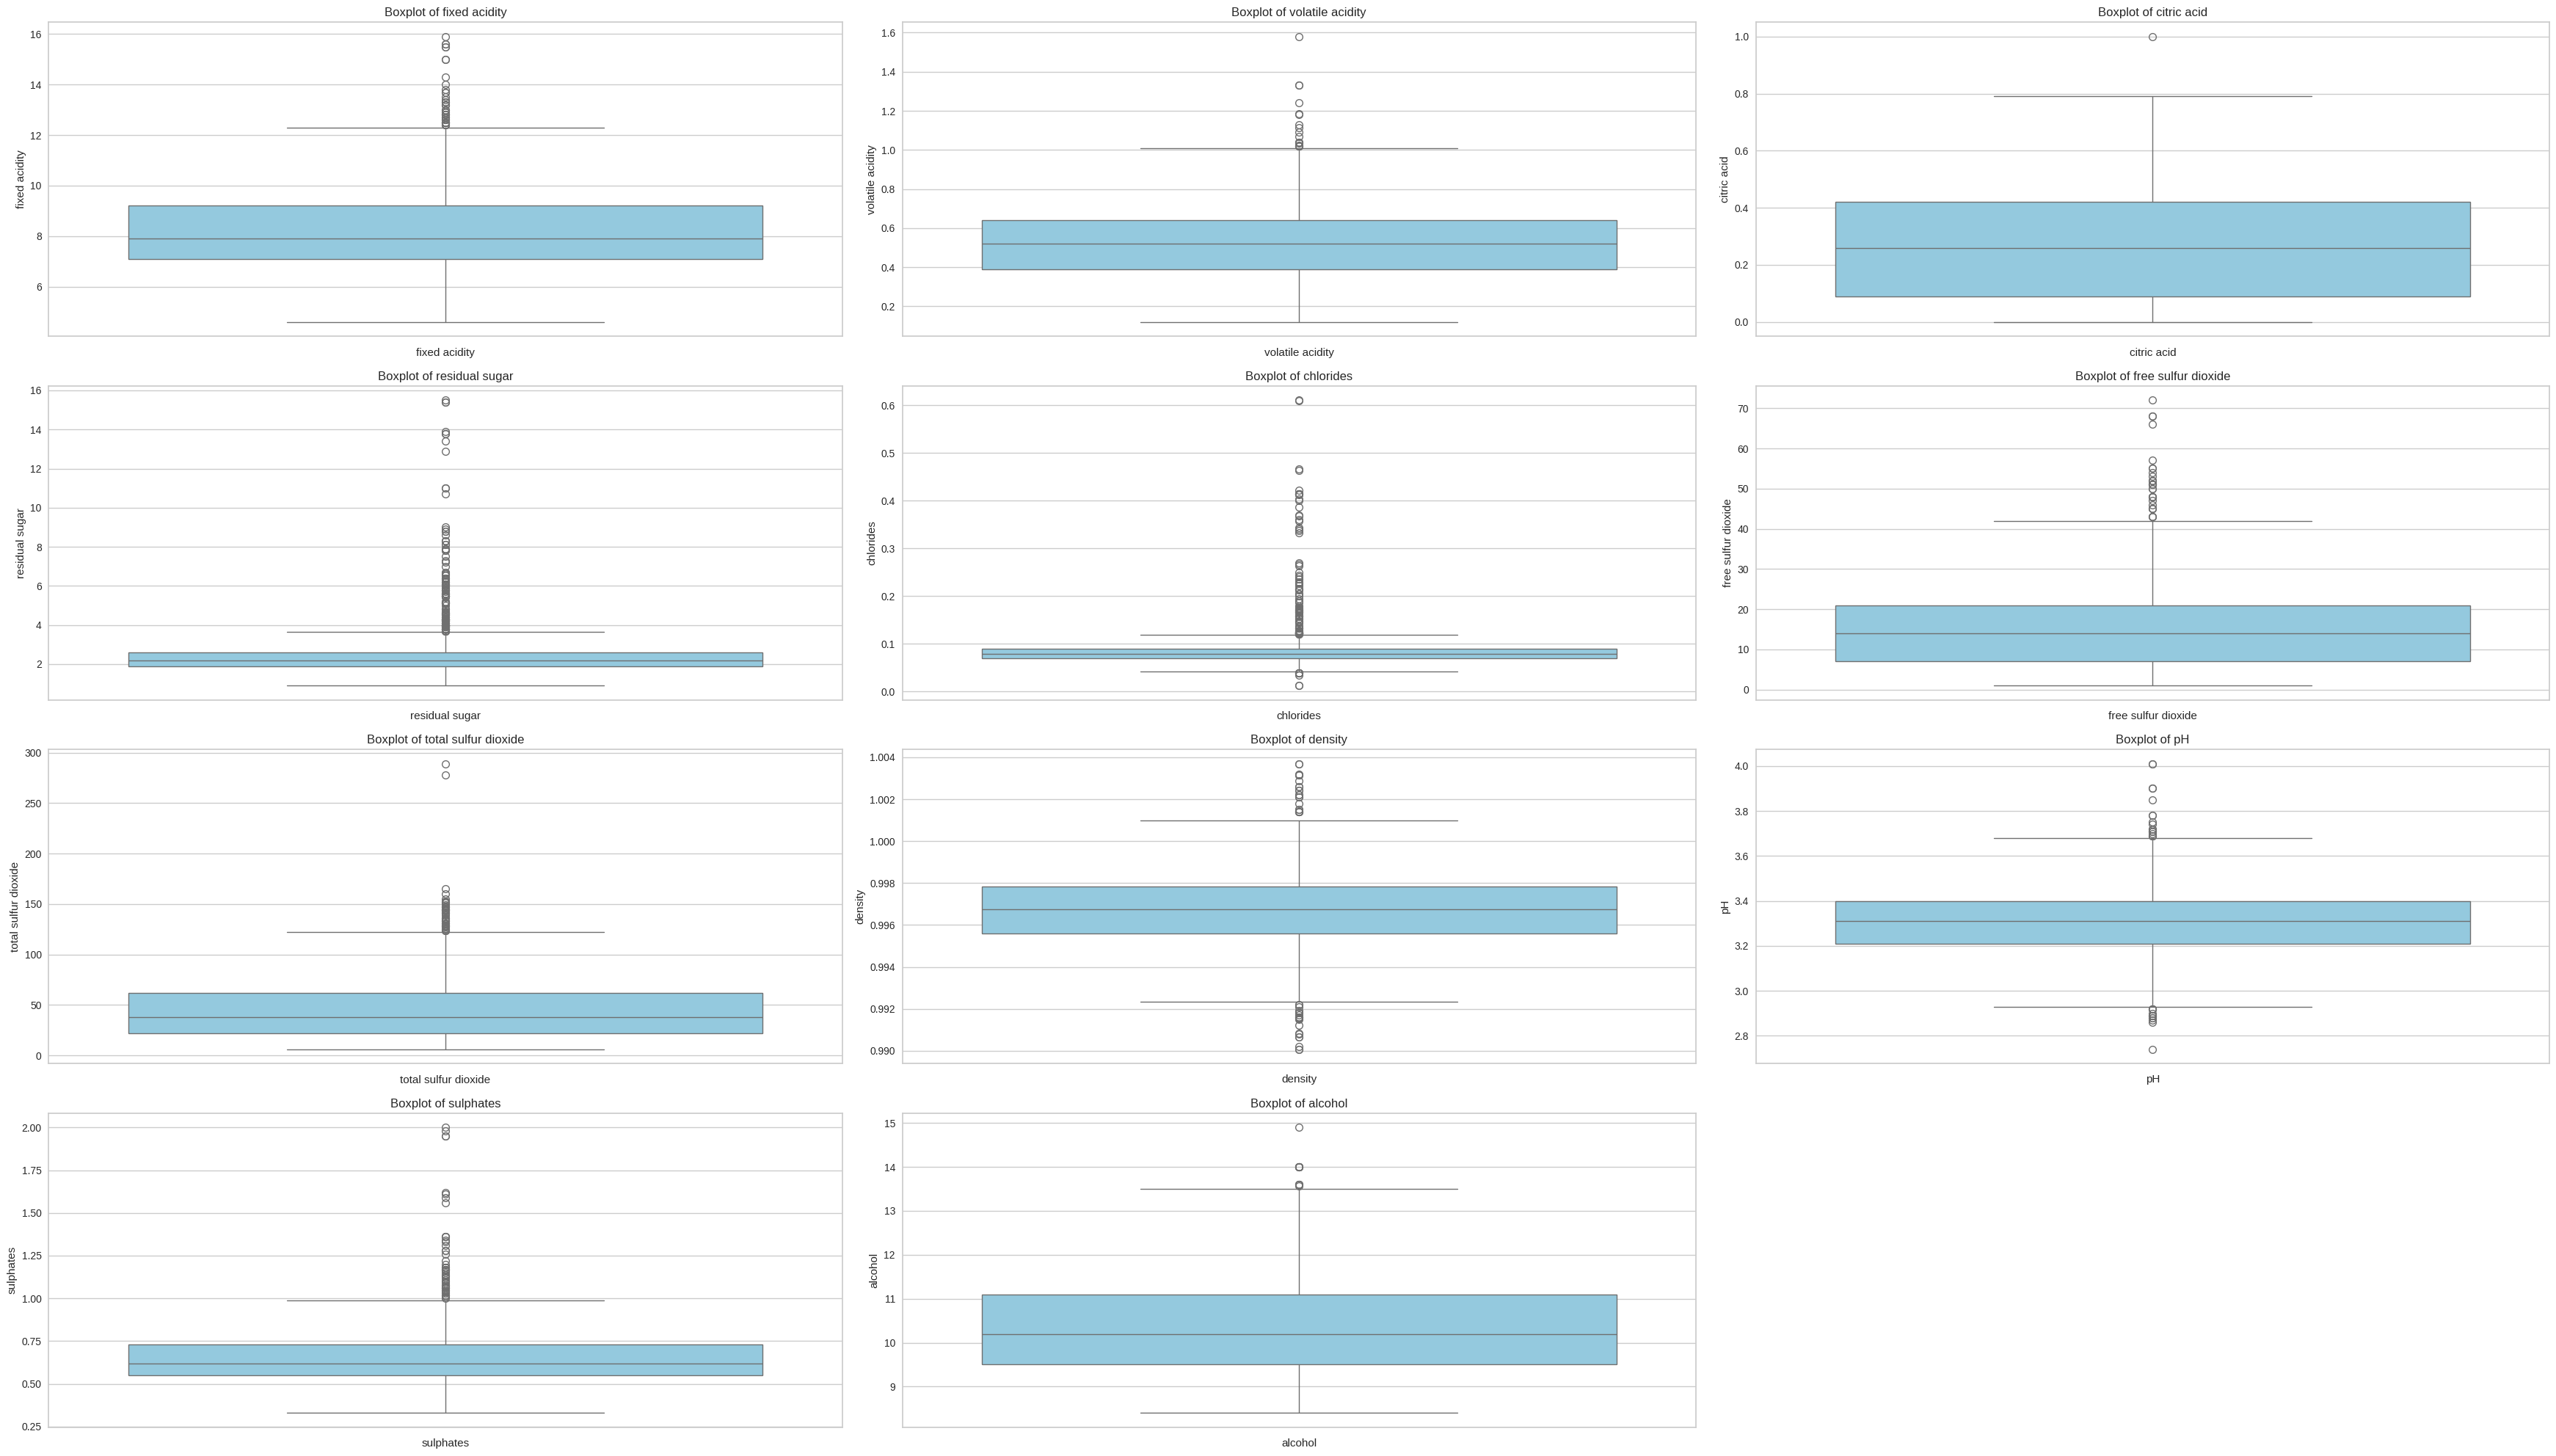

In [57]:
num_rows = (11+ 2) // 3 
plt.figure(figsize=(35, num_rows * 5))
for i, c in enumerate(wineRed_df.columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(data=wineRed_df[c], color='skyblue')
    plt.title(f'Boxplot of {c}')
    plt.xlabel(c)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [59]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(wineRed_df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']])

scaled_data

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [60]:
scaledRed_df = pd.DataFrame(scaled_data, index=wineRed_df.index, columns=('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'))

scaledRed_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.53,0.96,-1.39,-0.45,-0.24,-0.47,-0.38,0.56,1.29,-0.58,-0.96
1,-0.30,1.97,-1.39,0.04,0.22,0.87,0.62,0.03,-0.72,0.13,-0.58
2,-0.30,1.30,-1.19,-0.17,0.10,-0.08,0.23,0.13,-0.33,-0.05,-0.58
3,1.65,-1.38,1.48,-0.45,-0.26,0.11,0.41,0.66,-0.98,-0.46,-0.58
4,-0.53,0.96,-1.39,-0.45,-0.24,-0.47,-0.38,0.56,1.29,-0.58,-0.96
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.22,0.40,-0.98,-0.38,0.05,1.54,-0.08,-0.98,0.90,-0.46,0.07
1595,-1.39,0.12,-0.88,-0.24,-0.54,2.21,0.14,-0.86,1.35,0.60,0.73
1596,-1.16,-0.10,-0.72,-0.17,-0.24,1.26,-0.20,-0.53,0.71,0.54,0.54
1597,-1.39,0.65,-0.78,-0.38,-0.26,1.54,-0.08,-0.68,1.68,0.31,-0.21


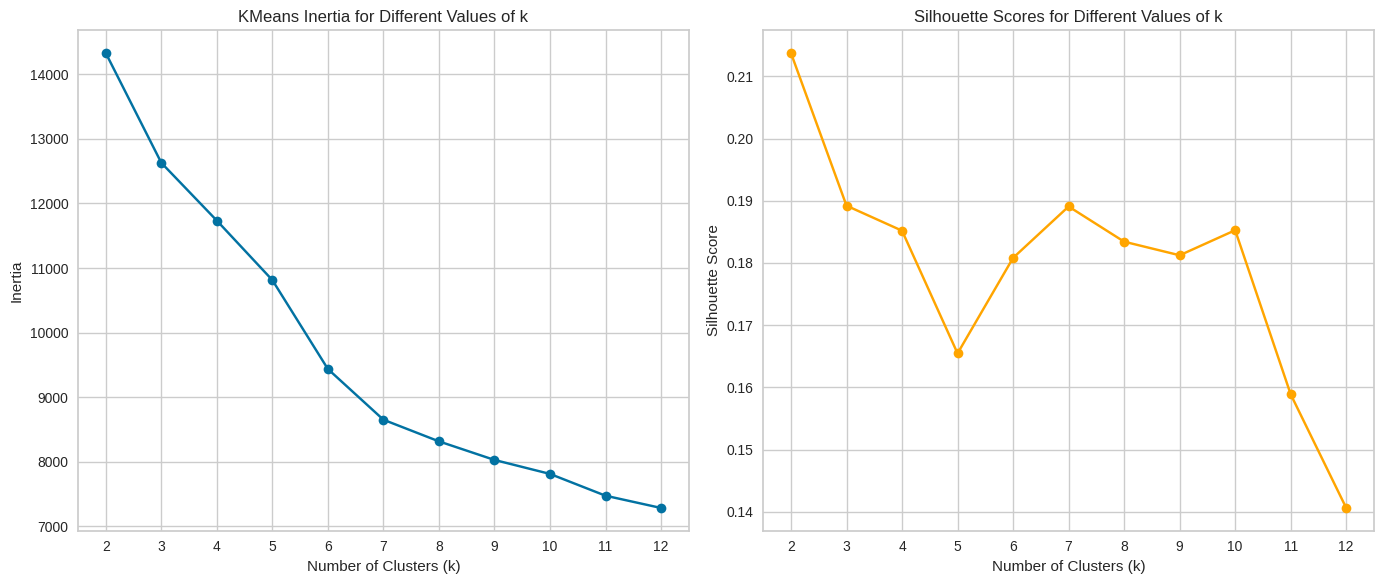

In [62]:

max_k = 12

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaledRed_df)

    sil_score = silhouette_score(scaledRed_df, cluster_labels)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

In [63]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaledRed_df)

cluster_labels

array([0, 2, 0, ..., 0, 0, 3], dtype=int32)

In [64]:
scaledRed_df["Cluster"] = cluster_labels

scaledRed_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Cluster
0,-0.53,0.96,-1.39,-0.45,-0.24,-0.47,-0.38,0.56,1.29,-0.58,-0.96,0
1,-0.30,1.97,-1.39,0.04,0.22,0.87,0.62,0.03,-0.72,0.13,-0.58,2
2,-0.30,1.30,-1.19,-0.17,0.10,-0.08,0.23,0.13,-0.33,-0.05,-0.58,0
3,1.65,-1.38,1.48,-0.45,-0.26,0.11,0.41,0.66,-0.98,-0.46,-0.58,1
4,-0.53,0.96,-1.39,-0.45,-0.24,-0.47,-0.38,0.56,1.29,-0.58,-0.96,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.22,0.40,-0.98,-0.38,0.05,1.54,-0.08,-0.98,0.90,-0.46,0.07,0
1595,-1.39,0.12,-0.88,-0.24,-0.54,2.21,0.14,-0.86,1.35,0.60,0.73,0
1596,-1.16,-0.10,-0.72,-0.17,-0.24,1.26,-0.20,-0.53,0.71,0.54,0.54,0
1597,-1.39,0.65,-0.78,-0.38,-0.26,1.54,-0.08,-0.68,1.68,0.31,-0.21,0


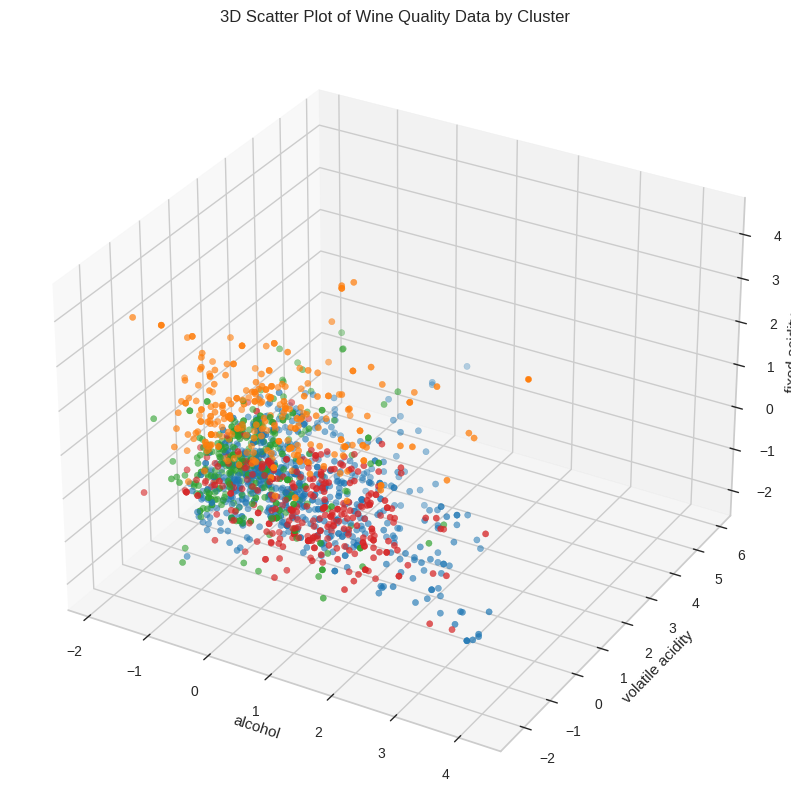

In [66]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = scaledRed_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(scaledRed_df['alcohol'], 
                     scaledRed_df['volatile acidity'], 
                     scaledRed_df['fixed acidity'],
                    
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('alcohol')
ax.set_ylabel('volatile acidity')
ax.set_zlabel('fixed acidity')

ax.set_title('3D Scatter Plot of Wine Quality Data by Cluster')

plt.show()

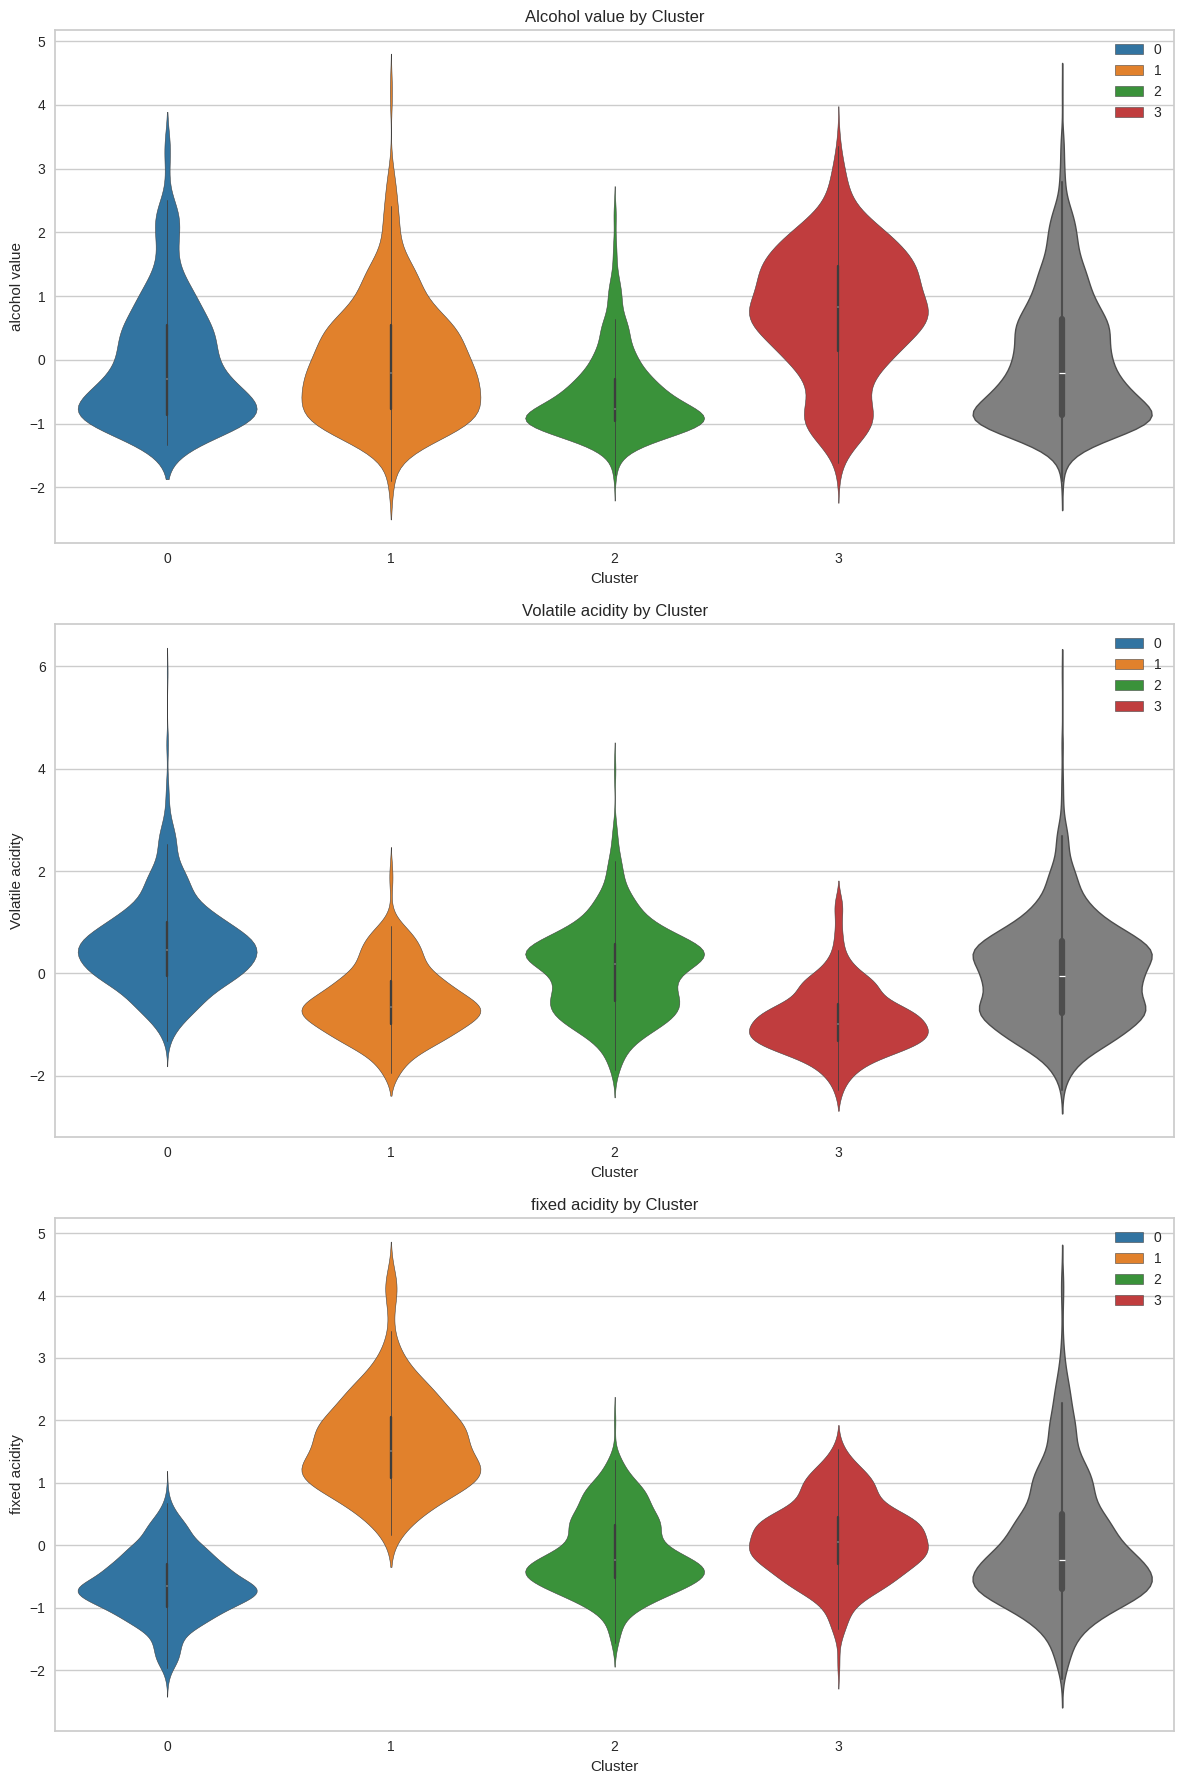

In [67]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=scaledRed_df['Cluster'], y=scaledRed_df['alcohol'], palette=cluster_colors, hue=scaledRed_df["Cluster"])
sns.violinplot(y=scaledRed_df['alcohol'], color='gray', linewidth=1.0)
plt.title('Alcohol value by Cluster')
plt.ylabel('alcohol value')

plt.subplot(3, 1, 2)
sns.violinplot(x=scaledRed_df['Cluster'], y=scaledRed_df['volatile acidity'], palette=cluster_colors, hue=scaledRed_df["Cluster"])
sns.violinplot(y=scaledRed_df['volatile acidity'], color='gray', linewidth=1.0)
plt.title('Volatile acidity by Cluster')
plt.ylabel('Volatile acidity')


plt.subplot(3, 1, 3)
sns.violinplot(x=scaledRed_df['Cluster'], y=scaledRed_df['fixed acidity'], palette=cluster_colors, hue=scaledRed_df["Cluster"])
sns.violinplot(y=scaledRed_df['fixed acidity'], color='gray', linewidth=1.0)
plt.title('fixed acidity by Cluster')
plt.ylabel('fixed acidity')

plt.tight_layout()
plt.show()

#### Cluster 0 :"Blue"
 * Red wines with Low alcohol level low fixed acidity and voltile acidity
#### Cluster 1 :"Orange"
 * Red wines with Low alcohol levels low volatile acidity but relatively high fixed acidity
#### Cluster 2 :"Green"
 * Red wines with Low alcohol levels relatively high volatile acidity but low fixed acidity 
#### Cluster 3 :"Red"

 * Red wines with high alcohol levels low volatile and fixed acidity.